In [14]:
import numpy as np
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

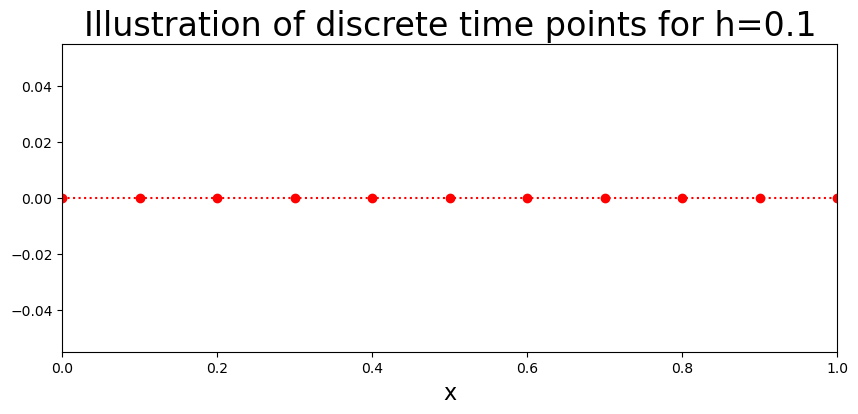

In [20]:
## BVP
N=10
h=1/N
x=np.linspace(0,1,N+1)
fig = plt.figure(figsize=(10,4))
plt.plot(x,0*x,'o:',color='red')
plt.xlim((0,1))
plt.xlabel('x',fontsize=16)
plt.title('Illustration of discrete time points for h=%s'%(h),fontsize=24)
plt.show()

In [16]:
U1=np.zeros(N+1)
U2=np.zeros(N+1)
Z1=np.zeros(N+1)
Z2=np.zeros(N+1)

lambda_app=[0.2]
U1[0]=-2.5
U2[0]=lambda_app[0]

Z1[0]=0
Z2[0]=1
beta=3

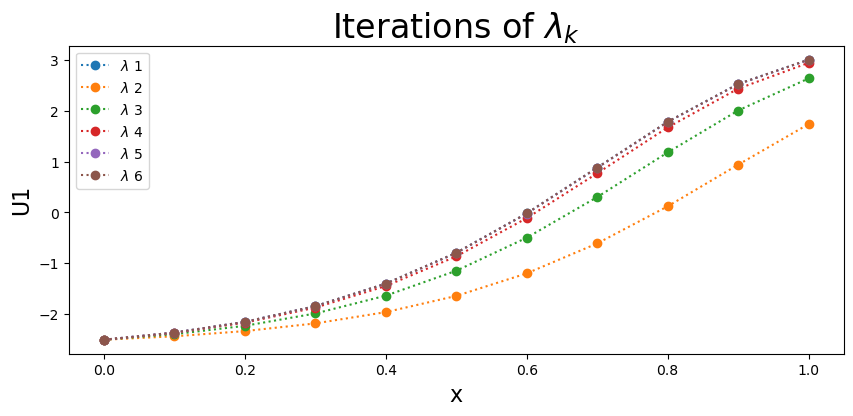

In [21]:
tol=0.0001
k=0
fig = plt.figure(figsize=(10,4))
while  k<20:
    k=k+1
    for i in range (0,N):
        U1[i+1]=U1[i]+h*(U2[i])
        U2[i+1]=U2[i]+h*(-2*U2[i]*U1[i])
    
        Z1[i+1]=Z1[i]+h*(Z2[i])
        Z2[i+1]=Z2[i]+h*(-2*U2[i]*Z1[i]-2*Z2[i]*U1[i])

    lambda_app.append(lambda_app[k-1]-(U1[N]-beta)/Z1[N])
   
    plt.plot(x,U1,':o',label=r"$\lambda$ %s"%(k))
    plt.xlabel('x',fontsize=16)
    plt.ylabel('U1',fontsize=16)
    U2[0]=lambda_app[k]
    if abs(lambda_app[k]-lambda_app[k-1])<tol:
        break
        
plt.legend(loc='best')
plt.title(r"Iterations of $\lambda_k$",fontsize=24)
plt.show()

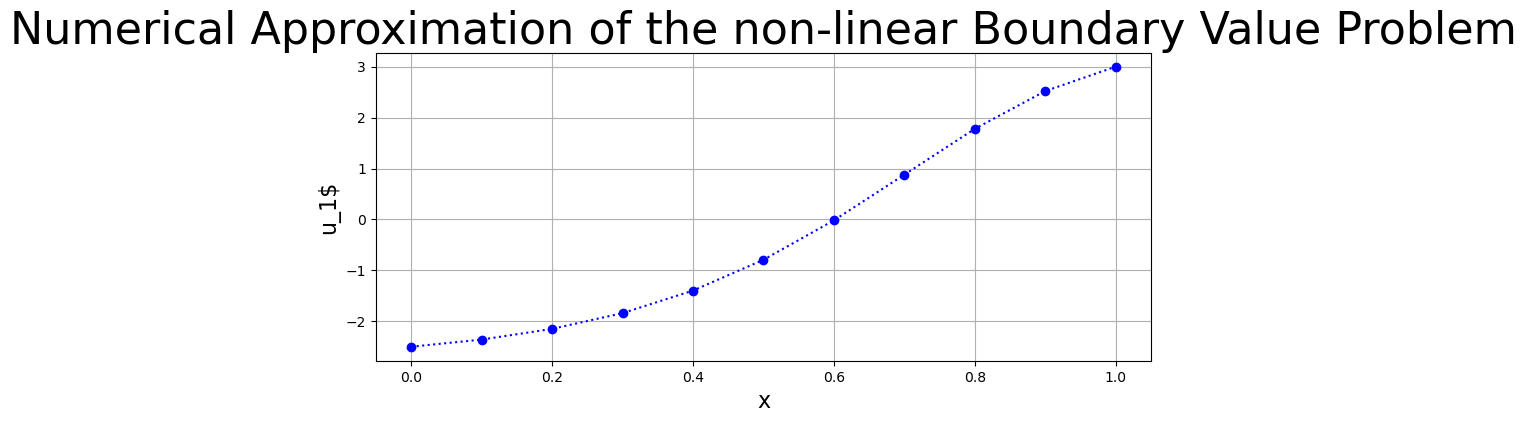

In [18]:
fig = plt.figure(figsize=(10,4))
plt.grid(True)
plt.plot(x,U1,'b:o')
plt.title("Numerical Approximation of the non-linear Boundary Value Problem",fontsize=32)
plt.xlabel('x',fontsize=16)
plt.ylabel("u_1$",fontsize=16)
plt.show()

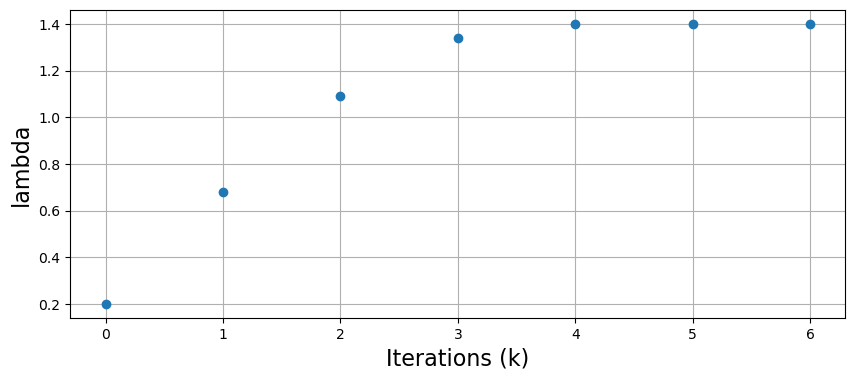

In [19]:
fig = plt.figure(figsize=(10,4))
plt.grid(True)
plt.plot(lambda_app,'o')
#plt.title("Values of $\lambda$ for each interation ",fontsize=32)
plt.xlabel('Iterations (k)',fontsize=16)
plt.ylabel("lambda",fontsize=16)
plt.show()